## Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [40]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from datetime import datetime
sea.set(style="white")
%matplotlib inline

In [41]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [44]:
# Calcula a média de preço por marca e por veículo

df2 = pd.DataFrame()

for b in list(df["brand"].unique()):
    
    for v in list(df["vehicleType"].unique()):
        
        m = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        df2 = df2.append(pd.DataFrame({'Marca':b , 'Tipo de Veículo':v , 'Preço Médio':m}, index=[0]))
        
df2 = df2.reset_index()
del df2["index"]
df2 = df2.dropna()

df2["Preço Médio"].fillna(0,inplace=True)
df2["Preço Médio"].isnull().value_counts()
df2["Preço Médio"] = df2["Preço Médio"].astype(int)

df2

,Marca,Tipo de Veículo,Preço Médio
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
5,volkswagen,cabrio,5784
6,volkswagen,kombi,3902
7,volkswagen,bus,5881
8,volkswagen,andere,2597
9,audi,Other,1012


## Preço médio de um veículo por marca e tipo de veículo

In [45]:
# Heatmap com Preço médio de um veículo por marca e tipo de veículo

df2 = df2.pivot("Marca","Tipo de Veículo", "Preço Médio")

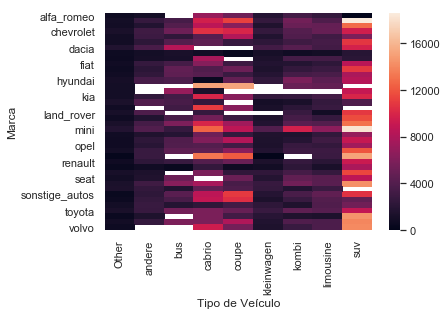

In [52]:
sea_heatmap = sea.heatmap(df2)

In [54]:
# Salvando o plot
sea_heatmap.get_figure().savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")